# <span style="color:#009933"> CREDIT CARD FRAUD DETECTION

## <span style="color:#cc0099"> PROBLEM STATEMENT

The Credit Card Frayd Detection problem includes modeling Past Credit Card Transactions with the knowledge of the ones that turned out to be fraud. This model is then used to identify wheather a new transaction if fraudlent or not.

### <span style="color:     ">CONTEXT

Due to card less transaction every people use ATM card and credit card for transaction, so fraud can also be increases.

Billions of dollars of loss are caused every year by fraudulent credit card transactions.the design of efficient fraud detection algorithms is key for reducing these losses.

## <span style="color:#66ccff">  DATA COLLECTION: 

This  dataset is collected from kaggle 
https://www.kaggle.com/kartik2112/fraud-detection

### <span style="color:#800000"> ABOUT DATASET

This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020 in USA . It covers credit cards of 1000 customers (USA) doing transactions with a pool of 800 merchants.
#### Source of Simulation:
This was generated using Sparkov Data Generation | Github tool created by Brandon Harris. This simulation was run for the duration - 1 Jan 2019 to 31 Dec 2020. The files were combined and converted into a standard format.

#### <span style="color:#cc0066">  EXPLANATION OF EACH FEATURE:
 * trans_date_trans_time : the transaction date and time of that customer
 * cc_num                : the credit card number of each customer
 * merchant              : A commercial entity or person authorized to accept cards and receive payments from its customers pursuant to  agreement with the card brands.                           
 * category              : type of category
 * amt                   : amount to be transfered in every transaction 
 * first                 : first name of customer
 * last                  : last name of customer
 * gender                : gender of card holder
 * street                : address of card holder
 * city                  : city of card holder
 * state                 : state of card holder
 * job                   : designation of card holder
 * dob                   : date of birth of card holder
 * trans_num             : transaction number
 * is_fraud              : tells that transaction was fraud or not?
  
 

In [1]:
### importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
df1=pd.read_csv("C:/Users/ELCOT/Desktop/abc/fraudTrain.csv/fraudTrain.csv")

In [3]:
df2=pd.read_csv("C:/Users/ELCOT/Desktop/abc/fraudTrain.csv/fraudTest.csv")

In [4]:
### loading data set
df=pd.concat([df1,df2])

In [5]:
df.head()   ##reading our data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

<AxesSubplot:>

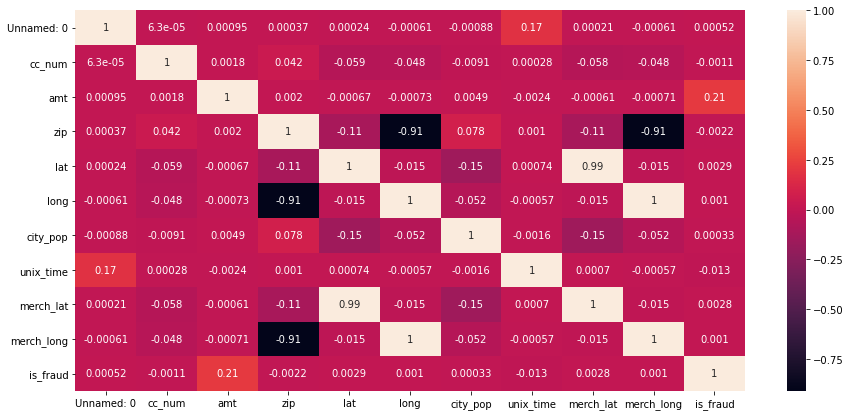

In [7]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)   ###checking correlation between features

In [8]:
#removing of columns which are not corelated
df.drop(columns=["zip","lat","long","city_pop","merch_lat","merch_long"],inplace=True)  

In [9]:
### un named column is the nothing but the id column so its not needed 
df.drop(columns="Unnamed: 0",inplace=True)

In [10]:
df.shape   ###shape of our data

(1852394, 16)

In [11]:
df.info()    ###information about our dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  job                    object 
 12  dob                    object 
 13  trans_num              object 
 14  unix_time              int64  
 15  is_fraud               int64  
dtypes: float64(1), int64(3), object(12)
memory usage: 240.3+ MB


In [12]:
df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
job                       object
dob                       object
trans_num                 object
unix_time                  int64
is_fraud                   int64
dtype: object

### <span style="color:#19004d"> EXPLORATORY DATA ANALYSIS

#### CHECKING FOR MISSING VALUES:

In [13]:
df.isna().sum()  ### count of missing values in each column

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
job                      0
dob                      0
trans_num                0
unix_time                0
is_fraud                 0
dtype: int64

In [14]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob',
       'trans_num', 'unix_time', 'is_fraud'],
      dtype='object')

### <span style="color:#009900"> TRANSACTIONS ANALYSIS:

0    1842743
1       9651
Name: is_fraud, dtype: int64


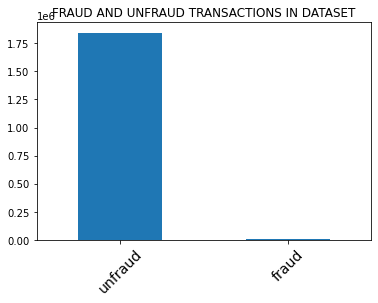

In [15]:
## in our datase frauded transactions are 0.52%
## in our data set  most transactions are unfrauded (99.47%)
## 9651/24= 402 fraud are hapens in month (24months 9651 fraud transaction)
print(df.is_fraud.value_counts())
a=df.is_fraud.value_counts().plot(kind="bar")
a.set_xticklabels(["unfraud","fraud"],rotation=45,fontsize=14)
a.set_title("FRAUD AND UNFRAUD TRANSACTIONS IN DATASET")
plt.show()


In [16]:
df.gender.value_counts()  ##looks females are more participates in the transaction

F    1014749
M     837645
Name: gender, dtype: int64

In [17]:
df.nunique()  ##checking for the no of unique values in each column

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
is_fraud                       2
dtype: int64

In [18]:
### converting data type 
df["trans_date_trans_time"]=pd.to_datetime(df["trans_date_trans_time"])

In [19]:
df.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
job                              object
dob                              object
trans_num                        object
unix_time                         int64
is_fraud                          int64
dtype: object

In [20]:
df["transaction_hour"]=df["trans_date_trans_time"].dt.hour ### extracting hour

In [21]:
df["transaction_day"]=df["trans_date_trans_time"].dt.day_name() ###extracting day

In [22]:
df["transaction_year_month"]=df["trans_date_trans_time"].dt.to_period("M")  ### extracting month and year

In [23]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,job,dob,trans_num,unix_time,is_fraud,transaction_hour,transaction_day,transaction_year_month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0,0,Tuesday,2019-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0,0,Tuesday,2019-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,0,Tuesday,2019-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,0,0,Tuesday,2019-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,0,0,Tuesday,2019-01


<span style="color:#ff0066"> TRANSACTION IN WEEK DAYS:

* more transaction are in "MONDAY" AND "SUNDAY"
* less transaction apppears in "wednesday"

<AxesSubplot:>

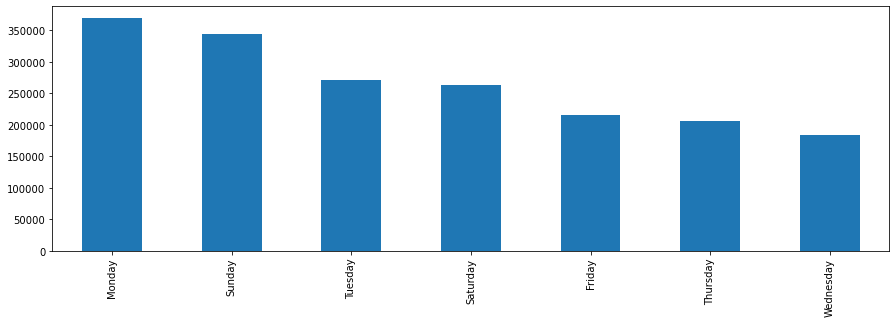

In [24]:
##monday ans sunday are most transaction are happens
plt.figure(figsize=(15,4.5))
df["transaction_day"].value_counts().plot(kind="bar") 

<span style="color:#993399"> TRANSACTIONS IN MONTH WISE:
 *  huge number of transactions are done in the "DECEMBER MONTH OF 2019 AND 2020"
 * less number  of transactions are happens in the " FEBRUARY of 2019 and 2020"

<AxesSubplot:>

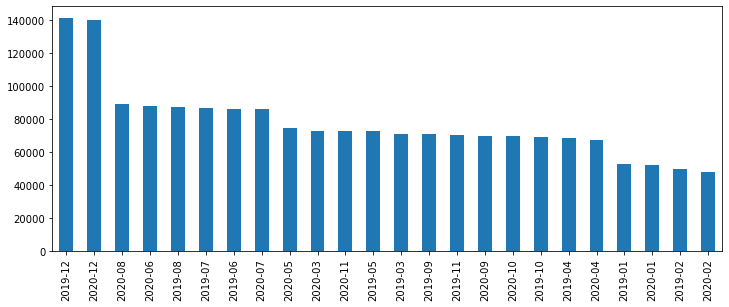

In [25]:
##in december most transactions are happend and lowest in february
plt.figure(figsize=(12,4.5))
df["transaction_year_month"].value_counts().plot(kind="bar") 

TRANSACTION ANALYSIS IN HOUR WISE:
 * huge transaction in the time of 
                       - night times (11 pm and 10 pm and 9 pm, 8pm)
                       - evening  times (3 pm,4pm,5pm  and 6 pm)
 * less ransaction are done in the time of *morning times(4 am,5am,11am..)                                 

<AxesSubplot:>

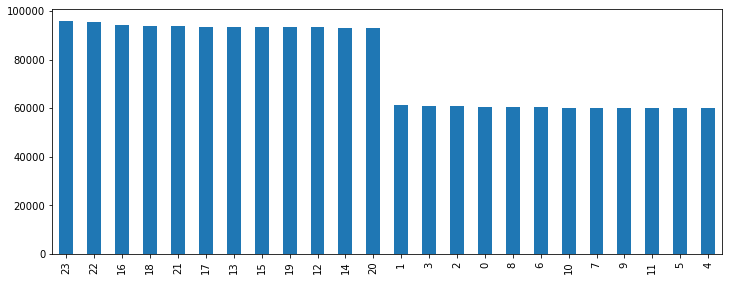

In [26]:
plt.figure(figsize=(12,4.5))
df["transaction_hour"].value_counts().plot(kind="bar")

In [27]:
 k=df.groupby("transaction_year_month")["trans_num"].nunique()

In [28]:
k

transaction_year_month
2019-01     52525
2019-02     49866
2019-03     70939
2019-04     68078
2019-05     72532
2019-06     86064
2019-07     86596
2019-08     87359
2019-09     70652
2019-10     68758
2019-11     70421
2019-12    141060
2020-01     52202
2020-02     47791
2020-03     72850
2020-04     66892
2020-05     74343
2020-06     87805
2020-07     85848
2020-08     88759
2020-09     69533
2020-10     69348
2020-11     72635
2020-12    139538
Freq: M, Name: trans_num, dtype: int64

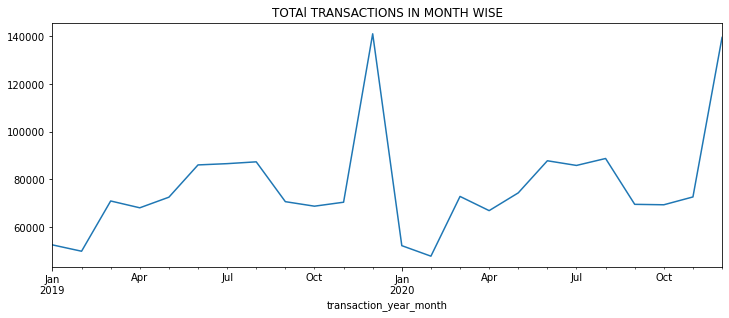

In [29]:
plt.figure(figsize=(12,4.5))   
### no of transaacion in month wise 
plt.title("TOTAl TRANSACTIONS IN MONTH WISE")
k.plot()
plt.show()

In [30]:
m=df.groupby("transaction_day")["trans_num"].nunique()

In [31]:
m

transaction_day
Friday       215078
Monday       369418
Saturday     263227
Sunday       343677
Thursday     206741
Tuesday      270340
Wednesday    183913
Name: trans_num, dtype: int64

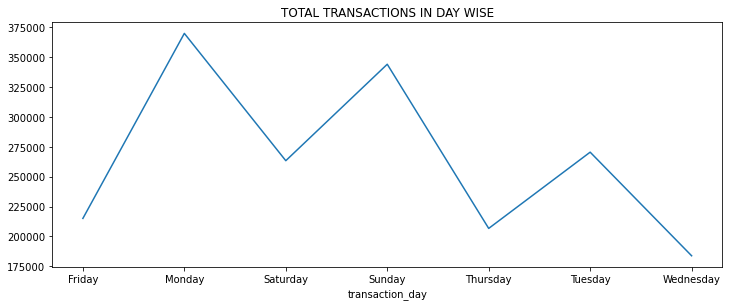

In [32]:
plt.figure(figsize=(12,4.5))
plt.title("TOTAL TRANSACTIONS IN DAY WISE")
m.plot()
plt.show()
### no of transactions  in day wise
### most transactions are happens in "monday" and "sunday"

In [33]:
fraud_df=df[df["is_fraud"]==1]             ## making two separate data frames for fraud and normal transactions
normal_df=df[df["is_fraud"]==0]

In [34]:
k1=fraud_df.groupby("transaction_year_month")["trans_num"].nunique()
k2=normal_df.groupby("transaction_year_month")["trans_num"].nunique()

In [35]:
k1,k2

(transaction_year_month
 2019-01    506
 2019-02    517
 2019-03    494
 2019-04    376
 2019-05    408
 2019-06    354
 2019-07    331
 2019-08    382
 2019-09    418
 2019-10    454
 2019-11    388
 2019-12    592
 2020-01    343
 2020-02    336
 2020-03    444
 2020-04    302
 2020-05    527
 2020-06    467
 2020-07    321
 2020-08    415
 2020-09    340
 2020-10    384
 2020-11    294
 2020-12    258
 Freq: M, Name: trans_num, dtype: int64,
 transaction_year_month
 2019-01     52019
 2019-02     49349
 2019-03     70445
 2019-04     67702
 2019-05     72124
 2019-06     85710
 2019-07     86265
 2019-08     86977
 2019-09     70234
 2019-10     68304
 2019-11     70033
 2019-12    140468
 2020-01     51859
 2020-02     47455
 2020-03     72406
 2020-04     66590
 2020-05     73816
 2020-06     87338
 2020-07     85527
 2020-08     88344
 2020-09     69193
 2020-10     68964
 2020-11     72341
 2020-12    139280
 Freq: M, Name: trans_num, dtype: int64)

### <span style="color:#004d4d"> FRAUD TRANSACTION ANALYSIS:

TOTAL FRAUD TRANSACTION 9651 IN THE 24 MONTHS SO,ON AVERAGE  TOTAL 402 FRAUD ARE HAPPENED IN MONTH 
FRAUD TRANSACTIONS IN MONTH WISE:
* most fraud transactions happens in "2019 DEC AND 2020 MAY"
* less fraud transactions in the month of " 2020 DEC AND 202 APRIL"

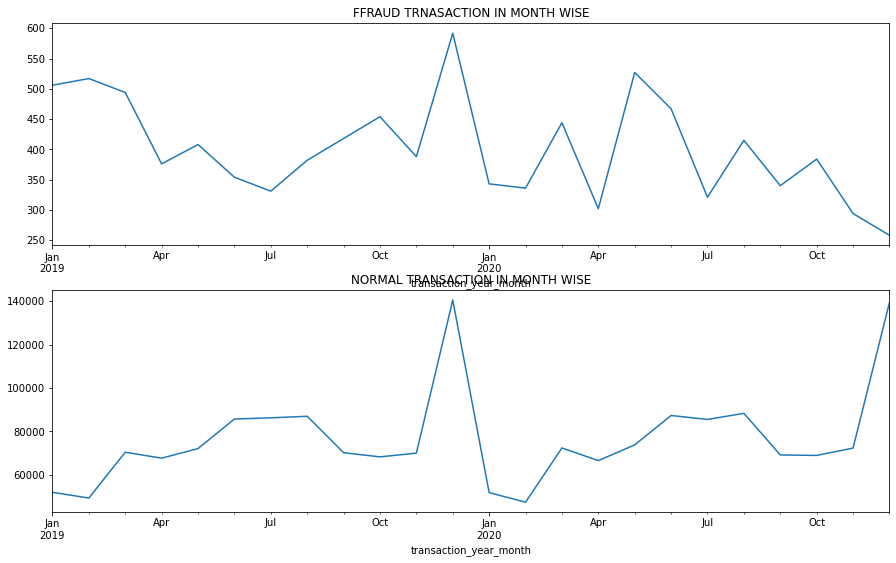

In [36]:
### we can see the picture of fraud and normal transactions in month wise
fig,axs=plt.subplots(2,1,figsize=(15,9))
k1.plot(ax=axs[0])
k2.plot(ax=axs[1])
axs[0].set_title("FFRAUD TRNASACTION IN MONTH WISE")
axs[1].set_title("NORMAL TRANSACTION IN MONTH WISE")
plt.show()

### <span style="color:#cc0066">customer analysis: 

In [37]:
### analysisng about fraud customers
fraud_customers=fraud_df.groupby("transaction_year_month")["cc_num"].nunique()
normal_customers=normal_df.groupby("transaction_year_month")["cc_num"].nunique()  

In [38]:
normal_customers

transaction_year_month
2019-01    908
2019-02    908
2019-03    908
2019-04    908
2019-05    908
2019-06    908
2019-07    908
2019-08    908
2019-09    908
2019-10    908
2019-11    908
2019-12    908
2020-01    908
2020-02    908
2020-03    908
2020-04    908
2020-05    908
2020-06    908
2020-07    908
2020-08    908
2020-09    908
2020-10    908
2020-11    908
2020-12    908
Freq: M, Name: cc_num, dtype: int64

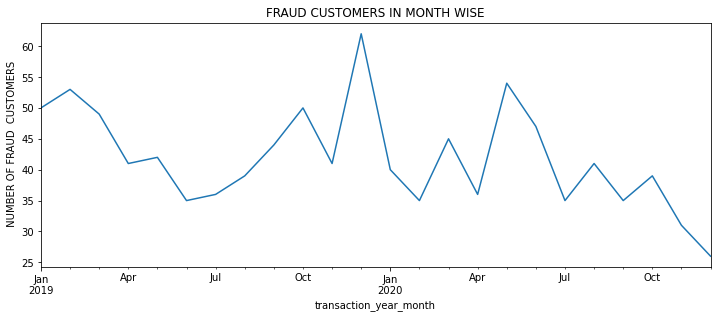

In [39]:
plt.figure(figsize=(12,4.5))
fraud_customers.plot()
plt.title("FRAUD CUSTOMERS IN MONTH WISE")
plt.ylabel(" NUMBER OF FRAUD  CUSTOMERS")    
plt.show()

### <span style="color:#8533ff"> GENDER ANALYSIS:


* most transactions are done by females compared by males
* in fraud list of transactions   * female:51%  * males  :49% 
*  it tells,that most of the fraud transaction happens in male credit cards,why because in our data set male transaction are less eventhough, it was nearer to  the fraud transaction % of females


In [40]:
df.gender.value_counts()   ### females done more transactions 

F    1014749
M     837645
Name: gender, dtype: int64

<AxesSubplot:>

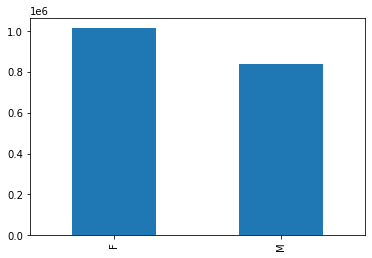

In [41]:
df.gender.value_counts().plot(kind="bar")

In [42]:
gender_fraud=pd.crosstab(df["gender"],df["is_fraud"]).apply(lambda x:x/x.sum()*100)

is_fraud          0          1
gender                        
F         54.801456  50.761579
M         45.198544  49.238421


<AxesSubplot:xlabel='is_fraud', ylabel='gender'>

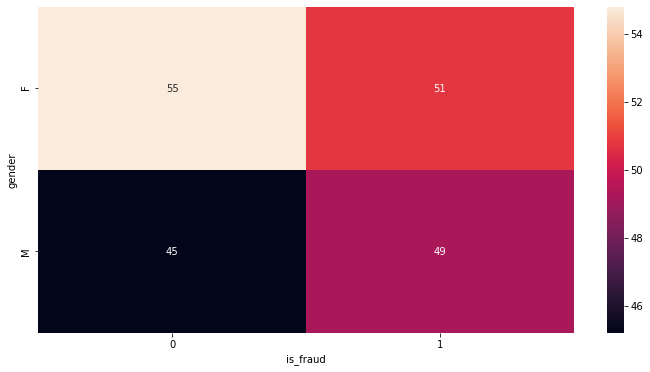

In [43]:
print(gender_fraud)  ### percentage of frauds in gender wise
plt.figure(figsize=(12,6))
sns.heatmap(gender_fraud,annot=True)  ## drawing of heatmap

C:\Users\ELCOT\.conda\envs\dsc_new\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


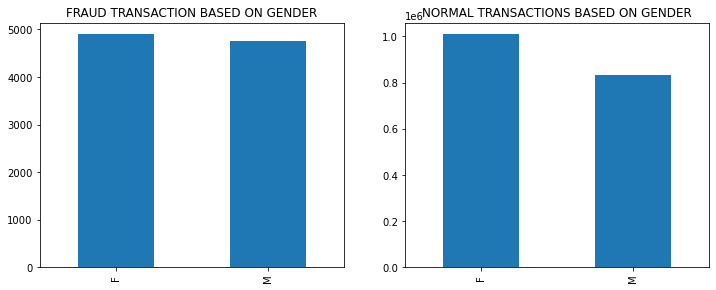

In [44]:
fig,axs=plt.subplots(1,2,figsize=(12,4.5))
fraud_df.gender.value_counts().plot(kind="bar",ax=axs[0])
normal_df.gender.value_counts().plot(kind="bar",ax=axs[1])
axs[0].set_title("FRAUD TRANSACTION BASED ON GENDER")    ## female are done more fraud transactions
axs[1].set_title("NORMAL TRANSACTIONS BASED ON GENDER")
plt.show()

### <span style="color:#993399"> transactions based on category:


* highest transaction are in the category of  "gas_transport" and "grocery_pos" and "home"
* lowest transaction are in the category of "travel" and "grocery_net"
* more fraud transaction happens in category of "grocery_pos" and "shopping_net"
* less fraud transaction in the category of "travel" and "grocery_net"

In [45]:
df.category.value_counts()

gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: category, dtype: int64

In [46]:
df.category.value_counts().apply(lambda x:x/df.category.count()*100)  ### percentage of categories in trasaction wise

gas_transport     10.150594
grocery_pos        9.511529
home               9.472067
shopping_pos       8.986371
kids_pets          8.730702
shopping_net       7.521186
entertainment      7.240252
food_dining        7.057300
personal_care      7.022534
health_fitness     6.615925
misc_pos           6.166561
misc_net           4.893883
grocery_net        3.502387
travel             3.128708
Name: category, dtype: float64

<AxesSubplot:>

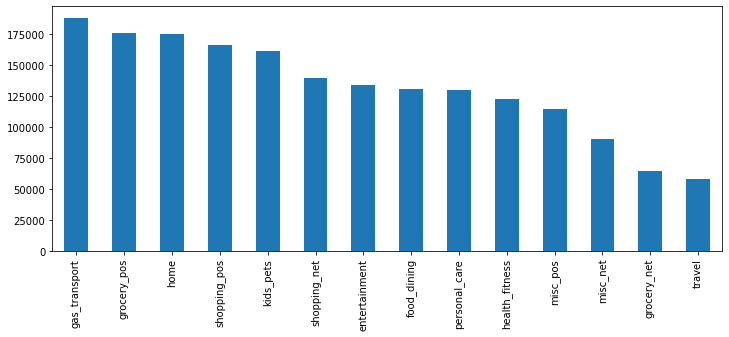

In [47]:
###most transactions are used for gas_transport and lower transactions are for travel purpose 
plt.figure(figsize=(12,4.5))
df.category.value_counts().plot(kind="bar")   

### <span style="color:#9900cc">category wise fraud analysis: 

C:\Users\ELCOT\.conda\envs\dsc_new\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


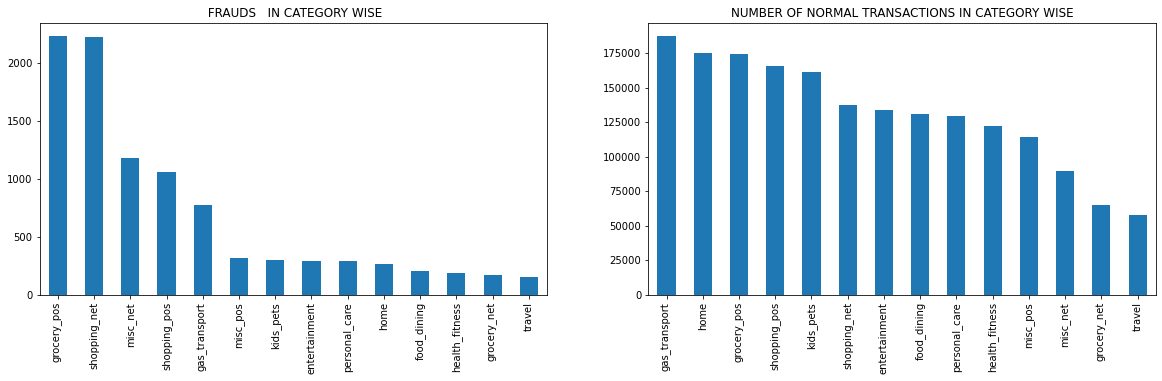

In [48]:
## frauds are more in "grocery_pos" and "shopping_net"
##frauds are less in "travel" and "grocery_net"
fig,axs=plt.subplots(1,2,figsize=(20,5))
fraud_df.category.value_counts().plot(kind="bar",ax=axs[0])
normal_df.category.value_counts().plot(kind="bar",ax=axs[1])    
axs[0].set_title(" FRAUDS   IN CATEGORY WISE")
axs[1].set_title("NUMBER OF NORMAL TRANSACTIONS IN CATEGORY WISE")
plt.show()

## <span style="color:#cc6600"> merchant analysis:

merchants who secure high score in fraud list:
   * fraud_kilback LLC  64%
   * fraud_rau and sons 62% 
merchants who secure low score in fraud list:
   * fraud_Ortiz Group                      0.01%
   * fraud_Schaefer, Fay and Hilll          0.01%
   
   


In [49]:
df.merchant.value_counts() ### more transaction are done by kilback llc and cormier llc

fraud_Kilback LLC                        6262
fraud_Cormier LLC                        5246
fraud_Schumm PLC                         5195
fraud_Kuhn LLC                           5031
fraud_Boyer PLC                          4999
                                         ... 
fraud_Douglas, DuBuque and McKenzie      1101
fraud_Treutel-King                       1098
fraud_Satterfield-Lowe                   1095
fraud_Hahn, Douglas and Schowalter       1091
fraud_Ritchie, Bradtke and Stiedemann    1090
Name: merchant, Length: 693, dtype: int64

In [50]:
fraud_df.merchant.value_counts().apply(lambda x:x/fraud_df.merchant.count()*100)   ##percentage of merchant

fraud_Kilback LLC                      0.642420
fraud_Kozey-Boehm                      0.621697
fraud_Rau and Sons                     0.621697
fraud_Doyle Ltd                        0.590612
fraud_Terry-Huel                       0.580251
                                         ...   
fraud_Romaguera and Sons               0.010362
fraud_Dietrich-Fadel                   0.010362
fraud_Prosacco, Kreiger and Kovacek    0.010362
fraud_Kuphal-Toy                       0.010362
fraud_Kub-Heaney                       0.010362
Name: merchant, Length: 685, dtype: float64

In [51]:
abc=fraud_df.merchant.value_counts()

In [52]:
xaxis=abc.index[0:12]

In [53]:
xaxis

Index(['fraud_Kilback LLC', 'fraud_Kozey-Boehm', 'fraud_Rau and Sons',
       'fraud_Doyle Ltd', 'fraud_Terry-Huel', 'fraud_Kuhn LLC',
       'fraud_Boyer PLC', 'fraud_Kiehn-Emmerich', 'fraud_Kuhic LLC',
       'fraud_Cormier LLC', 'fraud_Moen, Reinger and Murphy',
       'fraud_Mosciski, Ziemann and Farrell'],
      dtype='object')

In [54]:
yaxis=abc.values[0:12]

In [55]:
yaxis

array([62, 60, 60, 57, 56, 55, 55, 53, 53, 53, 53, 53], dtype=int64)

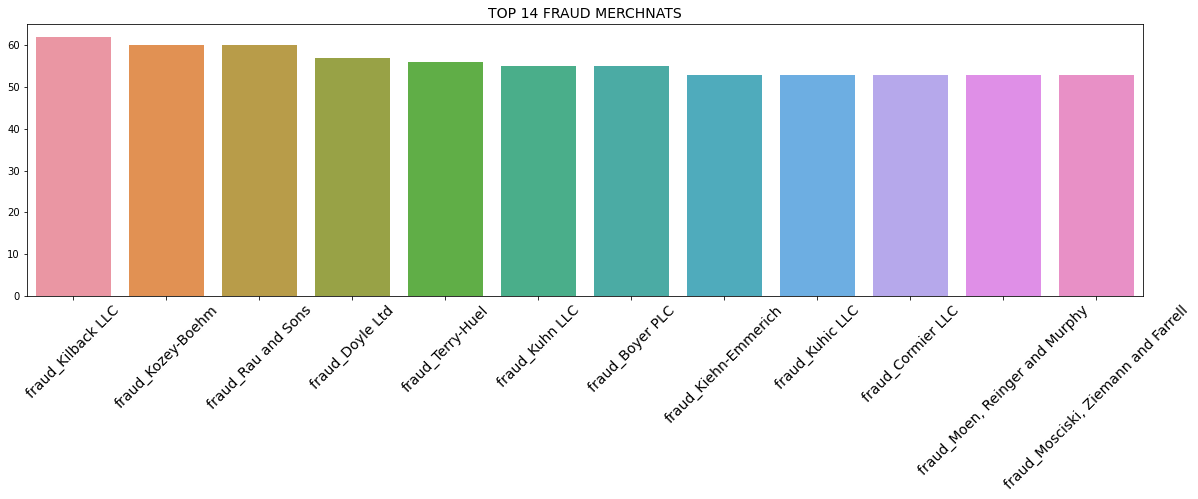

In [56]:
plt.figure(figsize=(20,5))
k=sns.barplot(x=xaxis,y=yaxis)
k.set_title("TOP 14 FRAUD MERCHNATS",fontsize=14)
k.set_xticklabels(k.get_xticklabels(),rotation=45,fontsize=14)
plt.show()   ### most fraud are happens in kilback  LLC and rau ans sons

### <span style="color:#cc00cc"> AMOUNT ANALYSIS: 

 * overall amount  mean: 67
 * fraud amount mean:530 
 it tells that fraud are happens in large amount which leads to more loss in economy

In [57]:
df.amt

0           4.97
1         107.23
2         220.11
3          45.00
4          41.96
           ...  
555714     43.77
555715    111.84
555716     86.88
555717      7.99
555718     38.13
Name: amt, Length: 1852394, dtype: float64

In [58]:
df.amt.describe()   ### information about transaction  amount

count    1.852394e+06
mean     7.006357e+01
std      1.592540e+02
min      1.000000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.310000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [59]:
fraud_df.amt.describe() ## information abour fraud transactions  amount

count    9651.000000
mean      530.661412
std       391.028873
min         1.060000
25%       240.075000
50%       390.000000
75%       902.365000
max      1376.040000
Name: amt, dtype: float64

In [60]:
normal_df.amt.describe() ##information about normal trnasaction amount

count    1.842743e+06
mean     6.765128e+01
std      1.535481e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.724000e+01
75%      8.256000e+01
max      2.894890e+04
Name: amt, dtype: float64

C:\Users\ELCOT\.conda\envs\dsc_new\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ELCOT\.conda\envs\dsc_new\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ELCOT\.conda\envs\dsc_new\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

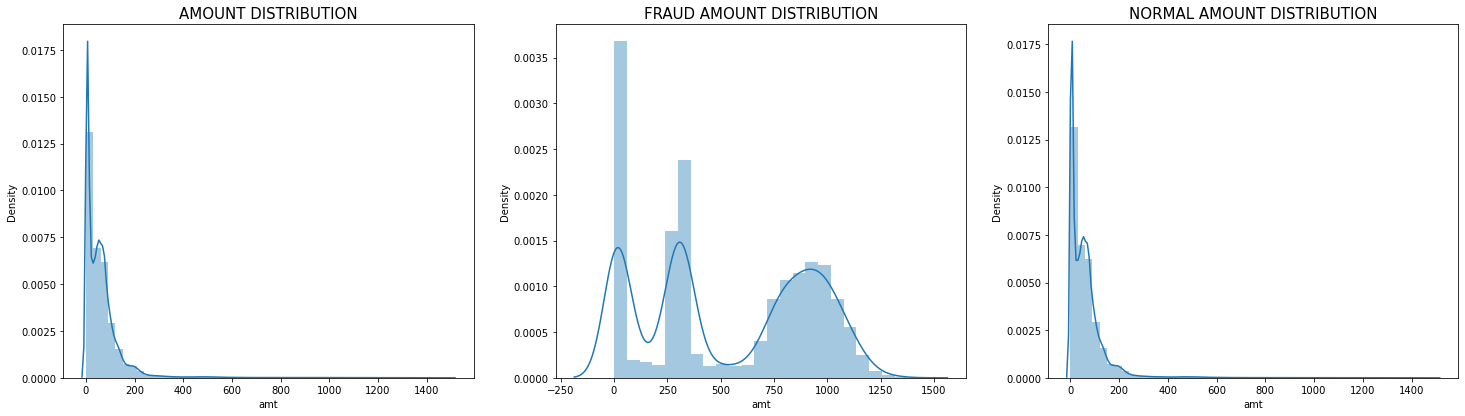

In [61]:
fig,axs=plt.subplots(1,3,figsize=(25,6.5))
k=sns.distplot(df[df["amt"]<=1500]["amt"],ax=axs[0])
k.set_title("AMOUNT DISTRIBUTION",fontsize=15)
m=sns.distplot(fraud_df[fraud_df["amt"]<=1500]["amt"],ax=axs[1])
m.set_title("FRAUD AMOUNT DISTRIBUTION",fontsize=15)
l=sns.distplot(normal_df[normal_df["amt"]<=1500]["amt"],ax=axs[2])
l.set_title("NORMAL AMOUNT DISTRIBUTION",fontsize=15)
plt.show()


In [62]:
fraud_df.job.value_counts()

Quantity surveyor                        69
Naval architect                          66
Materials engineer                       62
Audiological scientist                   58
Senior tax professional/tax inspector    57
                                         ..
Local government officer                  4
Professor Emeritus                        4
Statistician                              3
Health physicist                          3
Contractor                                2
Name: job, Length: 494, dtype: int64

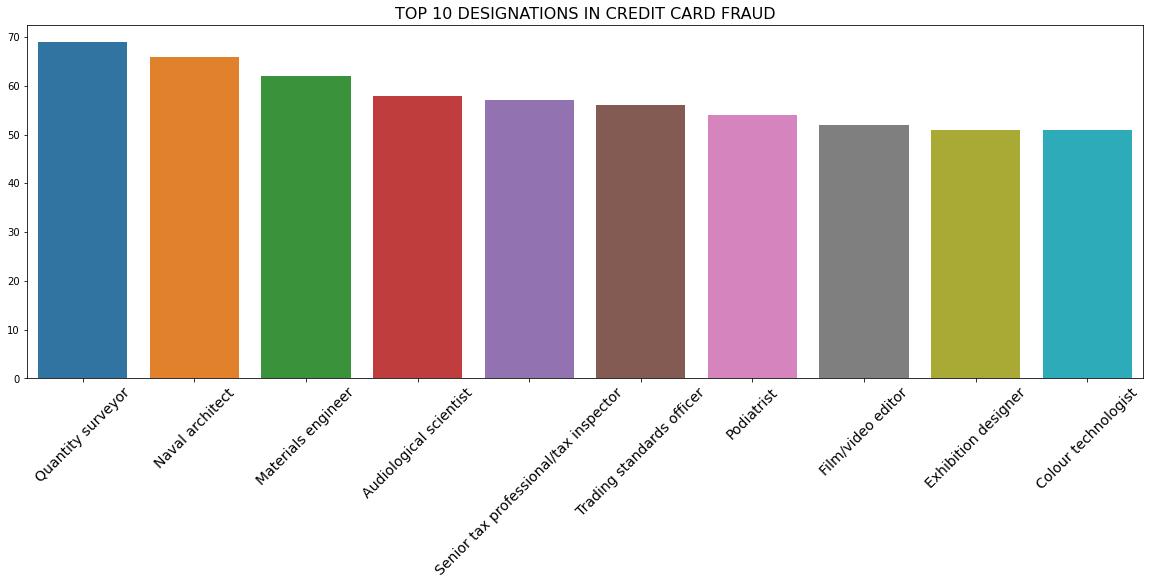

In [63]:
plt.figure(figsize=(20,6.5))
xaxis=fraud_df["job"].value_counts().index[0:10]
yaxis=fraud_df["job"].value_counts().values[0:10]   
k=sns.barplot(x=xaxis,y=yaxis)                        
k.set_xticklabels(k.get_xticklabels(),rotation=45,fontsize=14)
k.set_title("TOP 10 DESIGNATIONS IN CREDIT CARD FRAUD",fontsize=16)
plt.show()


###  <span style="color:#993366"> FRAUD ANALYSIS IN REGION WISE: 

THE FOLLOWING STATES RANKED AS HIGH IN FRAUD TRANSACTION:
*  texas (houston,dallas)
* new york (new york city)
LOWEST RANK SATES IN FRAUD TRANSACTIONS:
* minnesota
* alabama


C:\Users\ELCOT\.conda\envs\dsc_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


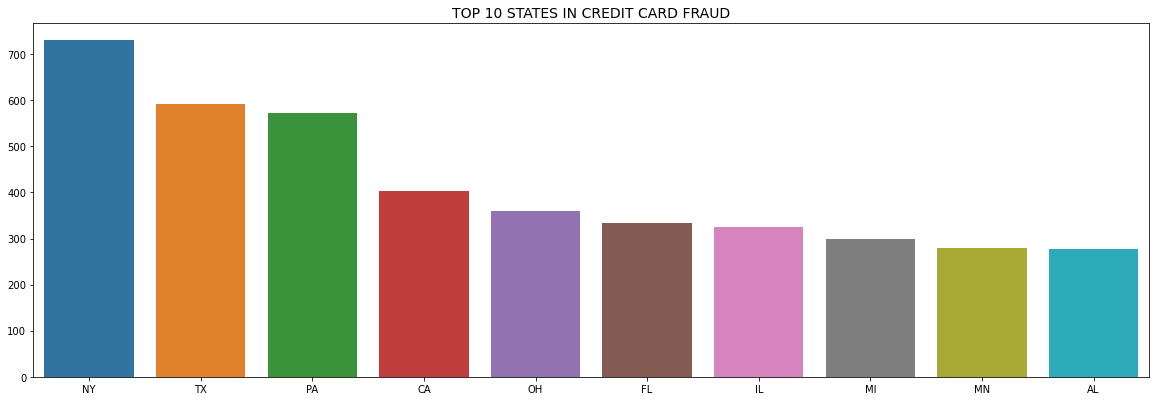

In [64]:
plt.figure(figsize=(20,6.5))
xaxis=fraud_df.state.value_counts().index[0:10]
yaxis=fraud_df.state.value_counts().values[0:10]
sns.barplot(xaxis,yaxis)
plt.title("TOP 10 STATES IN CREDIT CARD FRAUD",fontsize=14)
plt.show()

C:\Users\ELCOT\.conda\envs\dsc_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


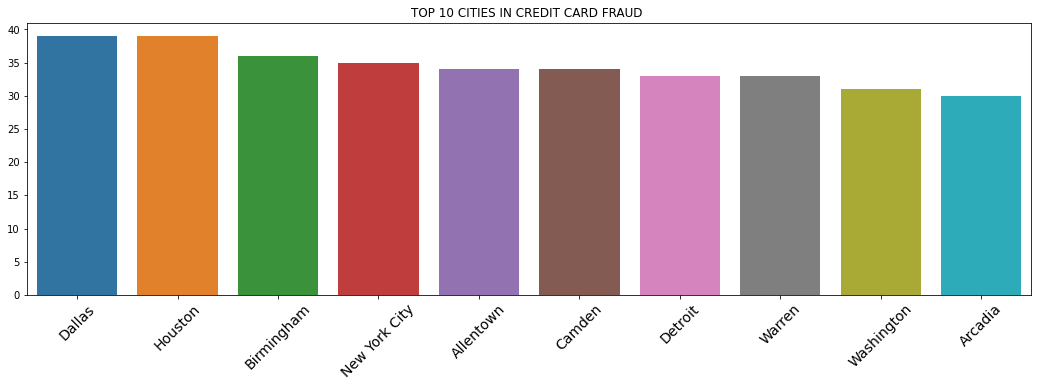

In [65]:
xaxis=fraud_df.city.value_counts().index[0:10]
yaxis=fraud_df.city.value_counts().values[0:10]
plt.figure(figsize=(18,5))
fig=sns.barplot(xaxis,yaxis)
fig.set_xticklabels(fig.get_xticklabels(),rotation=45,fontsize=14)
fig.set_title("TOP 10 CITIES IN CREDIT CARD FRAUD ")
plt.show()

<span style="color:red"> FRAUD ANALYSIS ACCORDING TO AGE:
   

 * more fraud happens in the 40-60 age of card holders 
 * less fraud transaction in the age group of 14-29

In [66]:
df["dob"]=pd.to_datetime(df["dob"]) 

In [67]:
df.dtypes

trans_date_trans_time     datetime64[ns]
cc_num                             int64
merchant                          object
category                          object
amt                              float64
first                             object
last                              object
gender                            object
street                            object
city                              object
state                             object
job                               object
dob                       datetime64[ns]
trans_num                         object
unix_time                          int64
is_fraud                           int64
transaction_hour                   int64
transaction_day                   object
transaction_year_month         period[M]
dtype: object

In [68]:
df["Age"]=np.round((df["trans_date_trans_time"]-df["dob"])/np.timedelta64(1,'Y'))

In [69]:
df["Age"].describe()

count    1.852394e+06
mean     4.626617e+01
std      1.741239e+01
min      1.400000e+01
25%      3.300000e+01
50%      4.400000e+01
75%      5.700000e+01
max      9.600000e+01
Name: Age, dtype: float64

In [70]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,job,dob,trans_num,unix_time,is_fraud,transaction_hour,transaction_day,transaction_year_month,Age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0,0,Tuesday,2019-01,31.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0,0,Tuesday,2019-01,41.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,0,Tuesday,2019-01,57.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,0,0,Tuesday,2019-01,52.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,0,0,Tuesday,2019-01,33.0


In [71]:
### lets create a categorical feature for age column
df["Age group"]=pd.cut(df.Age,bins=[14,29,40,60,96],labels=["young","young adults","senior","elder"])  


In [72]:
fraud_df=df[df["is_fraud"]==1]
normal_df=df[df["is_fraud"]==0]

In [73]:
## more transactions are done by "senior agr group" and "yound adults"
df.groupby("Age group")['trans_num'].count() 

Age group
young           315716
young adults    455806
senior          695743
elder           383688
Name: trans_num, dtype: int64

Text(0.5, 1.0, 'AGE GROUP VS COUNT OF CREDIT CARD FRAUD')

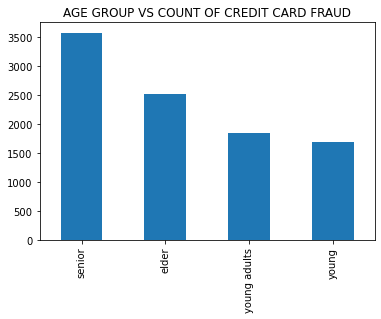

In [74]:
## most credit card fraud happens for senior and lowest for young age group credit cards
fraud_df["Age group"].value_counts().plot(kind="bar")
plt.title("AGE GROUP VS COUNT OF CREDIT CARD FRAUD")   

In [75]:
fraud_df["Age"].describe()

count    9651.000000
mean       48.837115
std        18.613483
min        14.000000
25%        33.000000
50%        48.000000
75%        61.000000
max        96.000000
Name: Age, dtype: float64

## <span style="color:#ff3300"> FEATURE ENGINEERING:

### <span style="color:#000066"> HANDLING   OF CATEGORICAL FEATURES:


for modelling machine algorithems are works with numeric data, for this we want to conver our categorical features into numeric.
for this step,pandas has inbuilt function of PD.GET_DUMMIES

In [76]:
df.dtypes

trans_date_trans_time     datetime64[ns]
cc_num                             int64
merchant                          object
category                          object
amt                              float64
first                             object
last                              object
gender                            object
street                            object
city                              object
state                             object
job                               object
dob                       datetime64[ns]
trans_num                         object
unix_time                          int64
is_fraud                           int64
transaction_hour                   int64
transaction_day                   object
transaction_year_month         period[M]
Age                              float64
Age group                       category
dtype: object

In [77]:
df.corr()          ### checking corelation between elements

,cc_num,amt,unix_time,is_fraud,transaction_hour,Age
cc_num,1.000000,0.001826,0.000284,-0.001125,-0.000902,-0.000976
amt,0.001826,1.000000,-0.002411,0.209308,-0.024891,-0.010738
unix_time,0.000284,-0.002411,1.000000,-0.013329,0.000571,0.028850
is_fraud,-0.001125,0.209308,-0.013329,1.000000,0.013196,0.010685
transaction_hour,-0.000902,-0.024891,0.000571,0.013196,1.000000,-0.173108
Age,-0.000976,-0.010738,0.028850,0.010685,-0.173108,1.000000


In [78]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob',
       'trans_num', 'unix_time', 'is_fraud', 'transaction_hour',
       'transaction_day', 'transaction_year_month', 'Age', 'Age group'],
      dtype='object')

In [79]:
category_dummies=pd.get_dummies(df.category,drop_first=True)   ##getting of dummies of categorical column

In [80]:
category_dummies

,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0,0,0,0,1,0,0,0,0,0,0,0,0
555715,0,0,0,0,0,0,1,0,0,0,0,0,0
555716,0,0,0,0,0,0,1,0,0,0,0,0,0
555717,0,0,0,0,0,0,0,0,0,0,0,0,1


In [81]:
gender_dummies=pd.get_dummies(df.gender,drop_first=True)    ### one hot encoding of gender column

In [82]:
gender_dummies

,M
0,0
1,0
2,1
3,1
4,1
...,...
555714,1
555715,1
555716,0
555717,1


In [83]:
day_dummies=pd.get_dummies(df['transaction_day'],drop_first=True)  ##one hot encoding for day column

In [84]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob',
       'trans_num', 'unix_time', 'is_fraud', 'transaction_hour',
       'transaction_day', 'transaction_year_month', 'Age', 'Age group'],
      dtype='object')

In [85]:
df["transaction_year"]=df['trans_date_trans_time'].dt.year  ###extracting year 

In [86]:
df["transaction_month"]=df['trans_date_trans_time'].dt.month   ###extracting month

In [87]:
cols=['cc_num','amt','transaction_hour','Age','is_fraud','transaction_year','transaction_month']

In [88]:
df_model=df[cols]   ##selecting particular colunms for building a model

In [89]:
df_model.columns

Index(['cc_num', 'amt', 'transaction_hour', 'Age', 'is_fraud',
       'transaction_year', 'transaction_month'],
      dtype='object')

In [90]:
###concating of diff values
df_model=pd.concat([df_model,category_dummies,gender_dummies,day_dummies],axis=1)   

In [91]:
df_model.columns

Index(['cc_num', 'amt', 'transaction_hour', 'Age', 'is_fraud',
       'transaction_year', 'transaction_month', 'food_dining', 'gas_transport',
       'grocery_net', 'grocery_pos', 'health_fitness', 'home', 'kids_pets',
       'misc_net', 'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos',
       'travel', 'M', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [92]:
df_model.shape

(1852394, 27)

###  <span style="color:#990000"> OVER SAMPLING:

 it is highly unbalanced, with the positive (frauds) accounting for only 0.17%. the data set was highly imbalanced, the major problem is some of the machine learning classifier algorithems will predict most common class without learning information about features ,and it will give high accuracy for our training data set when coming to test data set prediction accuracy we uses undersampling or over sampling techniques
 

In [93]:
df.is_fraud.value_counts()   ### the data be higly imbalanced 

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [94]:
import imblearn

random over sampling ,performs the work that it just takes the random samples from miniorty class which matches the count of majority class 

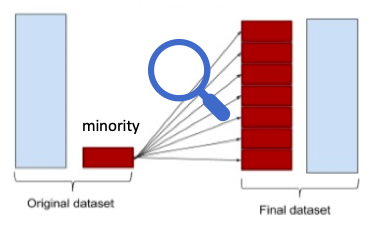

In [95]:
from imblearn.over_sampling import RandomOverSampler

In [96]:
random_sample=RandomOverSampler()    ##  importing random over sample

In [97]:
y=df.is_fraud

In [98]:
x=df_model.copy()

In [99]:
x.drop(columns="is_fraud",inplace=True)

In [100]:
y.value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [101]:
x_res,y_res=random_sample.fit_resample(x,y)    ### randomover sample

In [102]:
x_res.shape

(3685486, 26)

In [103]:
y_res.shape

(3685486,)

In [104]:
y_res.value_counts()

0    1842743
1    1842743
Name: is_fraud, dtype: int64

 ### <span style="color:#660066"> PLOTTING OF OVERSAMPLING WORK:

it looks like our sampled data is ready to build a model

C:\Users\ELCOT\.conda\envs\dsc_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ELCOT\.conda\envs\dsc_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


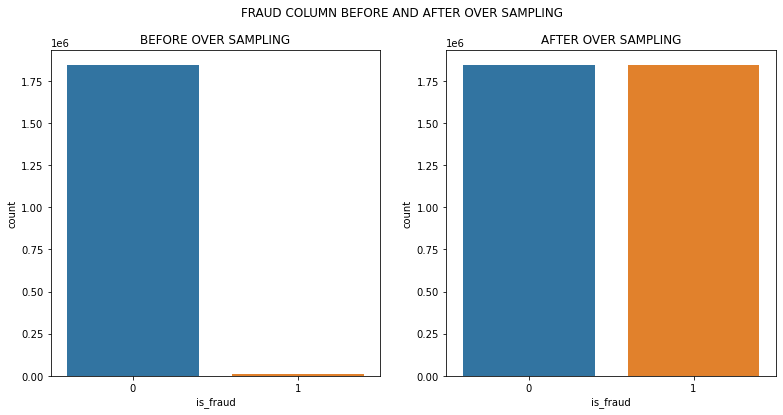

In [105]:
fig,axs=plt.subplots(ncols=2,figsize=(13,6))
sns.countplot(y_res,ax=axs[1])
sns.countplot(y,ax=axs[0])
fig.suptitle("FRAUD COLUMN BEFORE AND AFTER OVER SAMPLING")
a1=fig.axes[0]
a1.set_title("BEFORE OVER SAMPLING")
a2=fig.axes[1]
a2.set_title("AFTER OVER SAMPLING")
plt.show()


### <span style="color:#6600cc"> SPLITTING OF OUR DATA FOR TRAINING AND TESTING

we usually split our data into two subsets: training data and testing data (and sometimes to three: train, validate and test), and fit our model on the train data, in order to make predictions on the test data. When we do that, one of two thing might happen: we overfit our model or we underfit our model. 
 We don’t want any of these things to happen, because they affect the predictability of our model — we might be using a model that has lower accuracy and/or is ungeneralized (meaning you can’t generalize your predictions on other data). Let’s see what under and overfitting actually mean:
 ####   Overfitting
 Overfitting means that model we trained has trained “too well” and is now, well, fit too closely to the training dataset. This usually happens when the model is too complex (i.e. too many features/variables compared to the number of observations). This model will be very accurate on the training data but will probably be very not accurate on untrained or new data. It is because this model is not generalized (or not AS generalized), meaning you can generalize the results and can’t make any inferences on other data, which is, ultimately, what you are trying to do. Basically, when this happens, the model learns or describes the “noise” in the training data instead of the actual relationships between variables in the data. This noise, obviously, isn’t part in of any new dataset, and cannot be applied to it.
#### Underfitting
 when a model is underfitted, it means that the model does not fit the training data and therefore misses the trends in the data. It also means the model cannot be generalized to new data.this is usually the result of a very simple model (not enough predictors/independent variables). It could also happen when, for example, we fit a linear model (like linear regression) to data that is not linear. It almost goes without saying that this model will have poor predictive ability (on training data and can’t be generalized to other data).

#### train/Test Split
the data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.


In [106]:
from sklearn.model_selection import train_test_split    ##splitting of our data in to train and test parts

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.33,random_state=10)

In [108]:
x_train.head()

,cc_num,amt,transaction_hour,Age,transaction_year,transaction_month,food_dining,gas_transport,grocery_net,grocery_pos,...,shopping_net,shopping_pos,travel,M,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
1862349,4952583804639909,280.66,2,62.0,2019,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
331327,4129767952109660,2.72,23,47.0,2019,6,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2941494,6011917798331152,994.99,22,62.0,2020,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
243516,4247921790666,118.03,8,80.0,2019,5,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
549722,371226440126102,23.97,15,45.0,2019,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

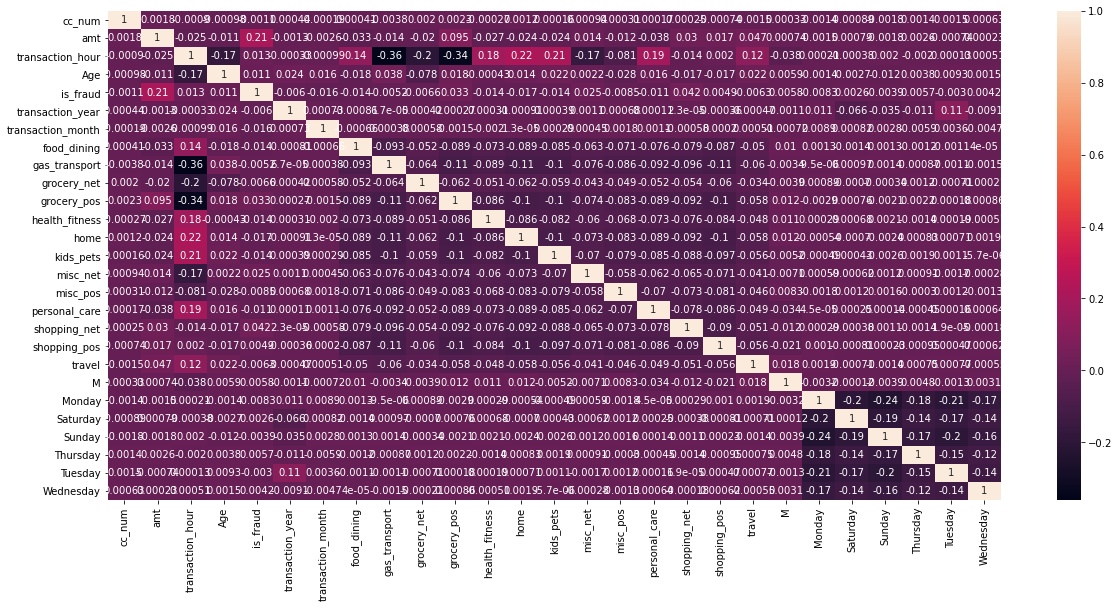

In [109]:
plt.figure(figsize=(20,9))
sns.heatmap(df_model.corr(),annot=True)  ###plotting correlation

### <span style="color:#3333ff"> SCALING OF FEATURES:

* min max scaler which will converts the values between 0 to 1
* highest value of particular feature ====1
* lowest value of that feature==0
* between values are ranged in between 0 to 1
  * x^=(x-xmin)/xmax-xmin

In [110]:
from sklearn.preprocessing import MinMaxScaler    ## importing min max scaler

In [111]:
sc=MinMaxScaler()

In [112]:
x_train=sc.fit_transform(x_train)

In [113]:
x_test=sc.transform(x_test)

### <span style="color:#ff0066"> MODEL BUILDING:

HERE, i uses different  machine learning algorithems ,
  * LOGISTIC REGRESSION
  * DECISION TREE
  * RANDOM FOREST
  * XG BOOST
  * SUPPORT VECTOR MACHINE

#### <span style="color:#0000ff"> LOGISTIC REGRESSION:

In [114]:
from sklearn.linear_model import LogisticRegression   ## importing logistic regression

In [115]:
logreg=LogisticRegression()

In [116]:
logreg.fit(x_train,y_train)   ## train our model

LogisticRegression()

In [117]:
y_pred=logreg.predict(x_test) ##making of predictions  for test data

In [118]:
y_pred_train=logreg.predict(x_train)  ## making predictions for train data

In [119]:
 ##importing metris libraries
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve  

In [120]:
accuracy_score(y_test,y_pred)   ##accuracy for test data

0.8204497410400005

In [121]:
accuracy_score(y_train,y_pred_train)   ##accuracy for train data

0.8202273946806249

In [122]:
cm_testdata=confusion_matrix(y_test,y_pred)     ## confusion matrix for test data

In [123]:
cm_traindata=confusion_matrix(y_train,y_pred_train)     ## confusion matrix for train data 

####  <span style="color:#800000"> DATA RESULTS (LOGISTIC REGRESSION): 

accuracy score for test data..... 0.8204497410400005
accuracy score for train data.... 0.8202273946806249
CONFUSION MATRIX FOR TEST DATA
[[539172  68449]
 [149922 458668]]
CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

           0       0.78      0.89      0.83    607621
           1       0.87      0.75      0.81    608590

    accuracy                           0.82   1216211
   macro avg       0.83      0.82      0.82   1216211
weighted avg       0.83      0.82      0.82   1216211

CONFUSION MATRIX FOR TRAIN DATA
[[1094761  140361]
 [ 303547  930606]]
CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       0.78      0.89      0.83   1235122
           1       0.87      0.75      0.81   1234153

    accuracy                           0.82   2469275
   macro avg       0.83      0.82      0.82   2469275
weighted avg       0.83      0.82      0.82   2469275



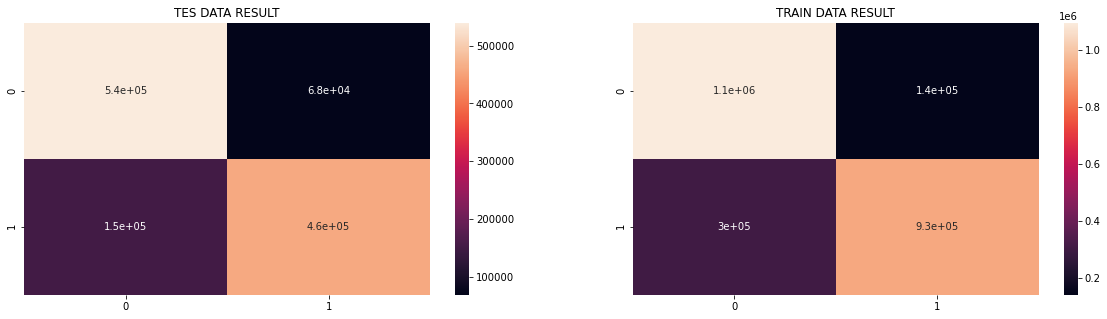

In [124]:
print("accuracy score for test data.....",accuracy_score(y_test,y_pred))   ##printing accuracy  for test data
print("accuracy score for train data....",accuracy_score(y_train,y_pred_train)) ## printing accuracy for train data
print("CONFUSION MATRIX FOR TEST DATA")
print(cm_testdata)       ### printing confusion matrix   for test data
print("CLASSIFICATION REPORT FOR TEST DATA")
print(classification_report(y_test,y_pred))    ### printing classification report  for test data
print("CONFUSION MATRIX FOR TRAIN DATA")
print(cm_traindata)           ### printing train data confusion matrix
print("CLASSIFICATION REPORT FOR TRAIN DATA")
print(classification_report(y_train,y_pred_train))     ##printing classification report for train data
fig,axs=plt.subplots(1,2,figsize=(20,5))
a=sns.heatmap(cm_testdata,annot=True,ax=axs[0])     ##plotting heatmap for test data confusion marix
a.set_title("TES DATA RESULT")
b=sns.heatmap(cm_traindata,annot=True,ax=axs[1])  ##plotting heatmap for confusion matrix of train data
b.set_title("TRAIN DATA RESULT")
plt.show()

###  <span style="color:#990099"> DECISION TREE:

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
dec=DecisionTreeClassifier()    # importing decision tree model

In [127]:
dec.fit(x_train,y_train)        ## fitting model

DecisionTreeClassifier()

In [128]:
y_pred=dec.predict(x_test)    ##prediction of test data

In [129]:
y_pred_train=dec.predict(x_train)   ### prediction for train data

In [130]:
cm_testdata=confusion_matrix(y_test,y_pred)   ### determination of confutioin matrix for test data

In [131]:
cm_traindata=confusion_matrix(y_train,y_pred_train)   ## determinationof confusion matrix for train data

####  <span style="color:#cc0066"> DECISION TREE RESULTS: 

accuracy score for test data..... 0.9993907307202451
accuracy score for train data.... 1.0
CONFUSION MATRIX FOR TEST DATA
[[606880    741]
 [     0 608590]]
CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    607621
           1       1.00      1.00      1.00    608590

    accuracy                           1.00   1216211
   macro avg       1.00      1.00      1.00   1216211
weighted avg       1.00      1.00      1.00   1216211

CONFUSION MATRIX FOR TRAIN DATA
[[1235122       0]
 [      0 1234153]]
CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1235122
           1       1.00      1.00      1.00   1234153

    accuracy                           1.00   2469275
   macro avg       1.00      1.00      1.00   2469275
weighted avg       1.00      1.00      1.00   2469275



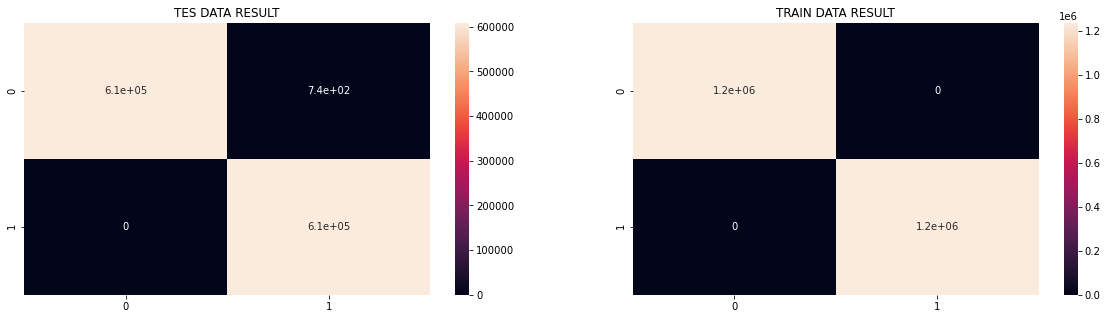

In [132]:
print("accuracy score for test data.....",accuracy_score(y_test,y_pred))   ##printing accuracy  for test data
print("accuracy score for train data....",accuracy_score(y_train,y_pred_train)) ## printing accuracy for train data
print("CONFUSION MATRIX FOR TEST DATA")
print(cm_testdata)       ### printing confusion matrix   for test data
print("CLASSIFICATION REPORT FOR TEST DATA")
print(classification_report(y_test,y_pred))    ### printing classification report  for test data
print("CONFUSION MATRIX FOR TRAIN DATA")
print(cm_traindata)           ### printing train data confusion matrix
print("CLASSIFICATION REPORT FOR TRAIN DATA")
print(classification_report(y_train,y_pred_train))     ##printing classification report for train data
fig,axs=plt.subplots(1,2,figsize=(20,5))
a=sns.heatmap(cm_testdata,annot=True,ax=axs[0])     ##plotting heatmap for test data confusion marix
a.set_title("TES DATA RESULT")
b=sns.heatmap(cm_traindata,annot=True,ax=axs[1])  ##plotting heatmap for confusion matrix of train data
b.set_title("TRAIN DATA RESULT")
plt.show()

#### <span style="color:#cc00cc"> RANDOM FOREST CLASSIFIER:

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
randomforest=RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)
      ## importing  random forest classifier

In [135]:
randomforest.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 29.3min finished


RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345,
                       verbose=1)

In [136]:
y_pred=randomforest.predict(x_test)   ### predicting result of test data

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   31.5s finished


In [137]:
y_pred_train=randomforest.predict(x_train)   ## predicting result of train data

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   57.1s finished


In [138]:
cm_testdata=confusion_matrix(y_test,y_pred)  ## predicting confusioin matrx

In [139]:
cm_traindata=confusion_matrix(y_train,y_pred_train)  ## predicting confusion matrix for train data 

#### <span style="color:#003399"> RESULTS OF RANDOM FOREST:

accuracy score for test data..... 0.9983226594727396
accuracy score for train data.... 0.9986056636057142
CONFUSION MATRIX FOR TEST DATA
[[605857   1764]
 [   276 608314]]
CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    607621
           1       1.00      1.00      1.00    608590

    accuracy                           1.00   1216211
   macro avg       1.00      1.00      1.00   1216211
weighted avg       1.00      1.00      1.00   1216211

CONFUSION MATRIX FOR TRAIN DATA
[[1232182    2940]
 [    503 1233650]]
CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1235122
           1       1.00      1.00      1.00   1234153

    accuracy                           1.00   2469275
   macro avg       1.00      1.00      1.00   2469275
weighted avg       1.00      1.00      1.00   2469275



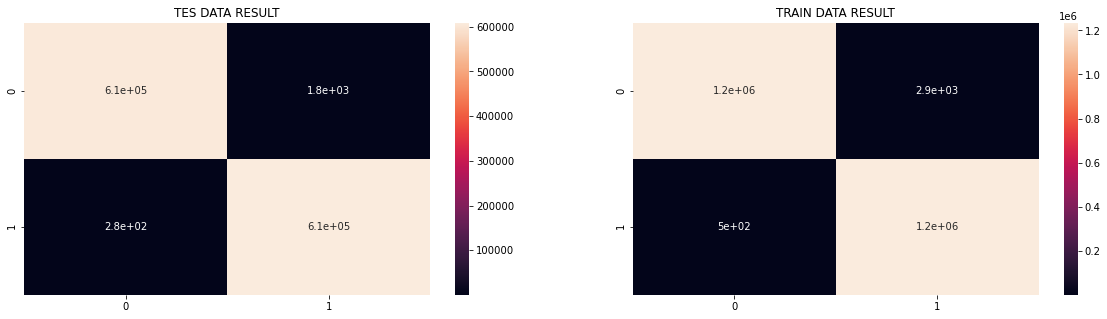

In [140]:
print("accuracy score for test data.....",accuracy_score(y_test,y_pred))   ##printing accuracy  for test data
print("accuracy score for train data....",accuracy_score(y_train,y_pred_train)) ## printing accuracy for train data
print("CONFUSION MATRIX FOR TEST DATA")
print(cm_testdata)       ### printing confusion matrix   for test data
print("CLASSIFICATION REPORT FOR TEST DATA")
print(classification_report(y_test,y_pred))    ### printing classification report  for test data
print("CONFUSION MATRIX FOR TRAIN DATA")
print(cm_traindata)           ### printing train data confusion matrix
print("CLASSIFICATION REPORT FOR TRAIN DATA")
print(classification_report(y_train,y_pred_train))     ##printing classification report for train data
fig,axs=plt.subplots(1,2,figsize=(20,5))
a=sns.heatmap(cm_testdata,annot=True,ax=axs[0])     ##plotting heatmap for test data confusion marix
a.set_title("TES DATA RESULT")
b=sns.heatmap(cm_traindata,annot=True,ax=axs[1])  ##plotting heatmap for confusion matrix of train data
b.set_title("TRAIN DATA RESULT")
plt.show()

####  <span style="color:#663300"> XGBOOST:

In [141]:
from xgboost import XGBClassifier

In [142]:
xgc=XGBClassifier()   ##importing xgboost classifier

In [143]:
xgc.fit(x_train,y_train)   ##fitting our model

C:\Users\ELCOT\.conda\envs\dsc_new\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:23:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [145]:
y_pred=xgc.predict(x_test)   ##making of predictions

C:\Users\ELCOT\.conda\envs\dsc_new\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [146]:
y_pred_train=xgc.predict(x_train)    ## making of predictions for train data

In [147]:
cm_testdata=confusion_matrix(y_test,y_pred)
cm_traindata=confusion_matrix(y_train,y_pred_train)   ## determination of confusion matrix

####  <span style="color:#333399"> XGBOOST RESULT:

accuracy score for test data..... 0.9951496903086717
accuracy score for train data.... 0.9952370635105446
CONFUSION MATRIX FOR TEST DATA
[[601837   5784]
 [   115 608475]]
CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    607621
           1       0.99      1.00      1.00    608590

    accuracy                           1.00   1216211
   macro avg       1.00      1.00      1.00   1216211
weighted avg       1.00      1.00      1.00   1216211

CONFUSION MATRIX FOR TRAIN DATA
[[1223611   11511]
 [    250 1233903]]
CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1235122
           1       0.99      1.00      1.00   1234153

    accuracy                           1.00   2469275
   macro avg       1.00      1.00      1.00   2469275
weighted avg       1.00      1.00      1.00   2469275



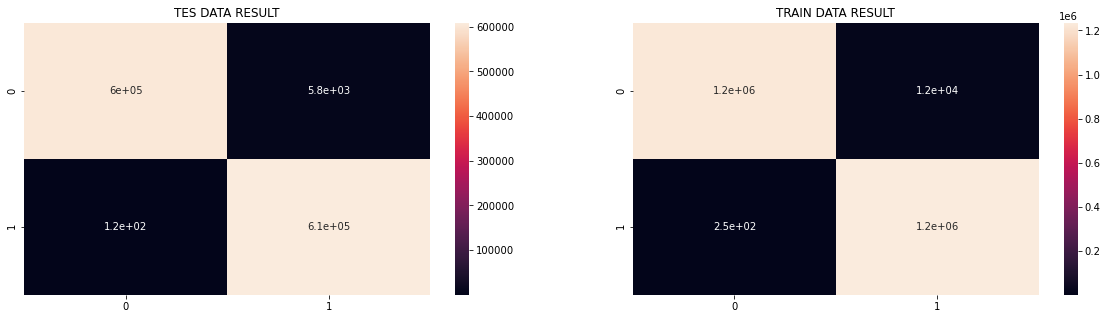

In [148]:
print("accuracy score for test data.....",accuracy_score(y_test,y_pred))   ##printing accuracy  for test data
print("accuracy score for train data....",accuracy_score(y_train,y_pred_train)) ## printing accuracy for train data
print("CONFUSION MATRIX FOR TEST DATA")
print(cm_testdata)       ### printing confusion matrix   for test data
print("CLASSIFICATION REPORT FOR TEST DATA")
print(classification_report(y_test,y_pred))    ### printing classification report  for test data
print("CONFUSION MATRIX FOR TRAIN DATA")
print(cm_traindata)           ### printing train data confusion matrix
print("CLASSIFICATION REPORT FOR TRAIN DATA")
print(classification_report(y_train,y_pred_train))     ##printing classification report for train data
fig,axs=plt.subplots(1,2,figsize=(20,5))
a=sns.heatmap(cm_testdata,annot=True,ax=axs[0])     ##plotting heatmap for test data confusion marix
a.set_title("TES DATA RESULT")
b=sns.heatmap(cm_traindata,annot=True,ax=axs[1])  ##plotting heatmap for confusion matrix of train data
b.set_title("TRAIN DATA RESULT")
plt.show()

## <span style="color:#cc0000"> CONCLUSION:

FROM above all MACHINE LEARNING ALGORITHEMS the following algorithems shows best results:
 * DECISION TREE
 * RANDOM FOREST